In [1]:
## Imports 
%matplotlib inline

STRUCTURED = '/Users/maru/MyCode/structured'
DATA= 'C:/Users/mramire8/Dropbox/My Papers/Structured Reading/Code/Data/sample3_v3_merge/'
DATA= '/Users/maru/Google Drive/AAL-Experiments/empirical-study/distribution/'


import sys
import os

import numpy as np
import nltk
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl

import fnmatch
import itertools

mpl.style.use('bmh')

In [41]:
def get_result_filenames(input_dir, measure,  recursive=False, filtername=""):

    names = []

    for in_dir in input_dir:
        for path, subdirs, files in os.walk(in_dir):
            for filename in files:   
                # print fnmatch.fnmatch(filename, ""+dataset+"*"+measure+".TXT")
                # print filename, ""+dataset+"*"+measure+".TXT"
                if fnmatch.fnmatch(filename, "*"+filtername+"*"+measure+".ave.txt"):
                    names.append(os.path.join(path, filename))
            if not recursive:
                break
    return names

def load_data_results(filename):
    import csv 
    from collections import defaultdict
    results = defaultdict(lambda : [])
    header = []
    with open(filename, 'rb') as csvfile:
        sents = csv.DictReader(csvfile, delimiter='\t', quotechar='"')
        for row in sents:
            
            for k,v in row.items():
                results[k].append(float(v) * 1.)
            
    return results
def get_name(k):
    if "RND" in k.upper():
        return "RND"
    elif "LEAST" in k.upper():
        return 'UNC'
    elif k[:2] in "N0":
        return "p=-"+k[1:]
    elif k[0] in "0":
        return "p="+k
    else:
        return k
# for f in file_names:
# test = load_data_results(file_names[0])
    



In [5]:
file_names = get_result_filenames([DATA + "letteram/"], 'precision',recursive=False, filtername='')
lbl_names = ["-".join(np.array([get_name(k) for k in name.split('_')])[[1,10]]) for name in file_names]
# print file_names
results = load_data_results(file_names[0])
print results.keys()



['Std', 'SDevS3', 'SDevS2', 'TrainSize', 'Worst', 'Aveprecision', 'Best', 'AveMinCprecision']


In [7]:
print results.keys()


['Std', 'SDevS3', 'SDevS2', 'TrainSize', 'Worst', 'Aveprecision', 'Best', 'AveMinCprecision']


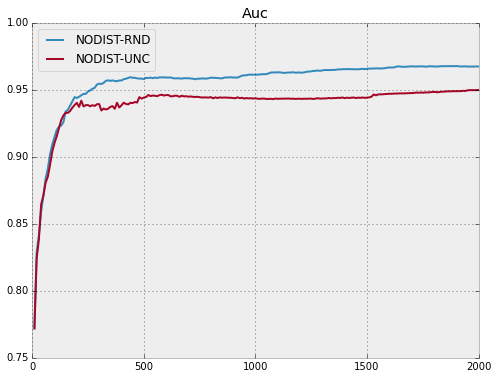

In [105]:

def plot_measure(path, measure, ax=None):
    file_names = get_result_filenames(path, measure,recursive=False, filtername='')
    lbl_names = ["-".join(np.array([get_name(k) for k in name.split('_')])[[1,10]]) for name in file_names]
    
    results = {}
    
    for fi, na  in zip(file_names, lbl_names):
        results[na] = load_data_results(fi)
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6)) 
    
    for k,v in results.items():
        if k in ['NODIST-RND','NODIST-UNC', 'p=03-RND','p=04-RND','p=045-RND',
                 'p=04-RND']:
            if measure in ['auc','accu']:
                ax.plot(v['TrainSize'][:-1], v['Ave'+measure][:-1], label=k)
            elif measure in ['precision','recall']:
                ax.plot(v['TrainSize'][:-1], v['AveMinC'+measure][:-1], label=k)

            
    plt.xlim([0,2000])
    ax.legend(loc='best')
    ax.set_title(measure.title())
    return ax

a = plot_measure([DATA + "letteram/"],'auc')

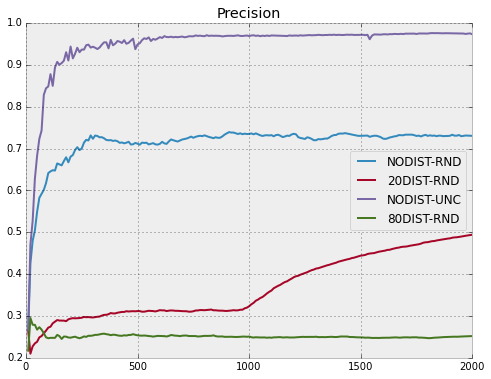

In [9]:
plot_measure([DATA + "letteram/"],'precision')

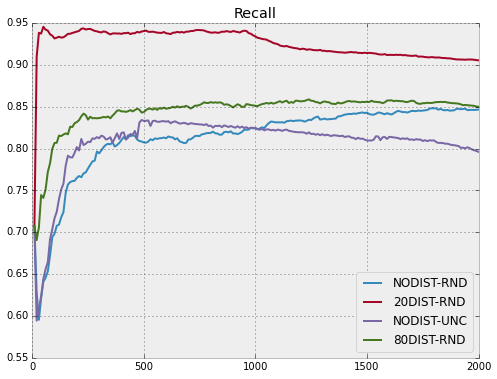

In [10]:
plot_measure([DATA + "letteram/"],'recall')

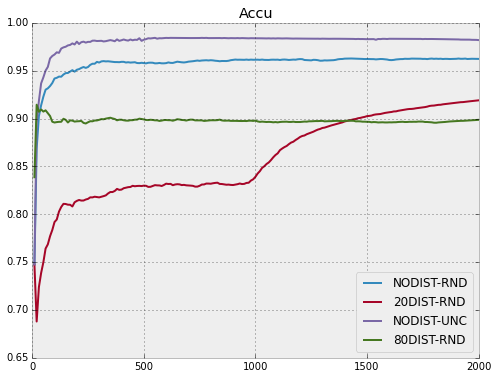

In [11]:
plot_measure([DATA + "letteram/"],'accu')

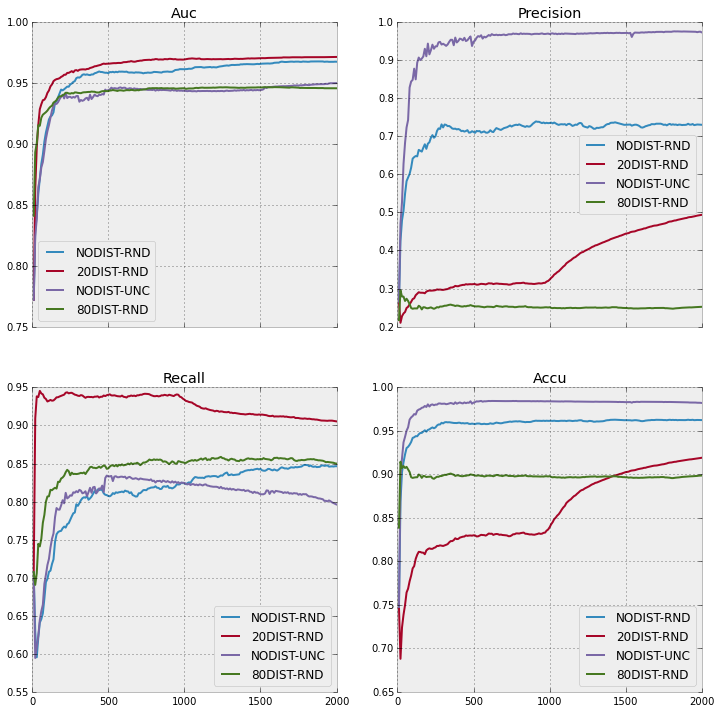

In [12]:
me = ['auc', 'precision', 'recall', 'accu']
sbp = [221,222,223,224]

ax = None
_, a = plt.subplots(2,2,figsize=(12,12), sharex='all')
for m,s in zip(me,[a[0][0], a[0][1], a[1][0], a[1][1]]):
    
    ax = plot_measure([DATA + "letteram/"],m, s)
plt.savefig("all_measures_dist.pdf", bbox_inches="tight", dpi=200, transparent=True)

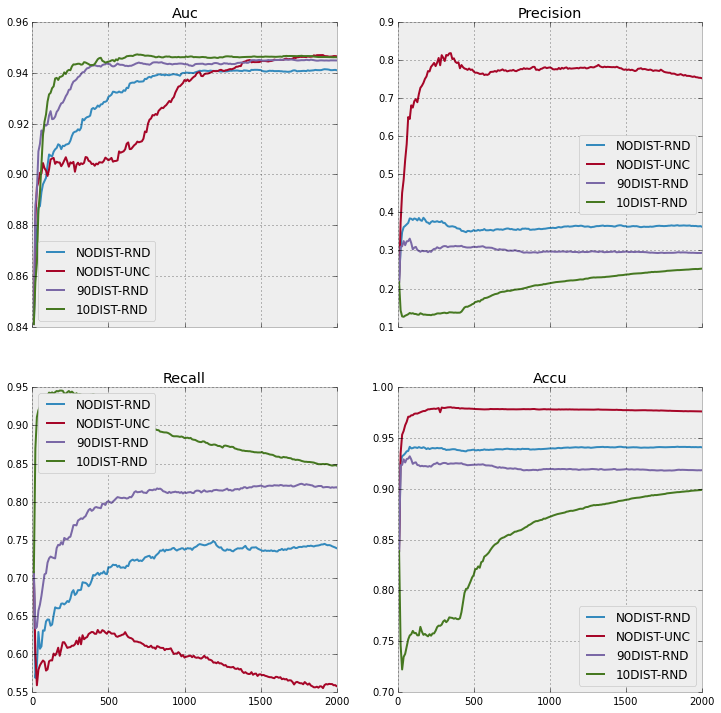

In [13]:
ax = None
_, a = plt.subplots(2,2,figsize=(12,12), sharex='all')
for m,s in zip(me,[a[0][0], a[0][1], a[1][0], a[1][1]]):
    ax = plot_measure([DATA + "lettero/"],m, s)



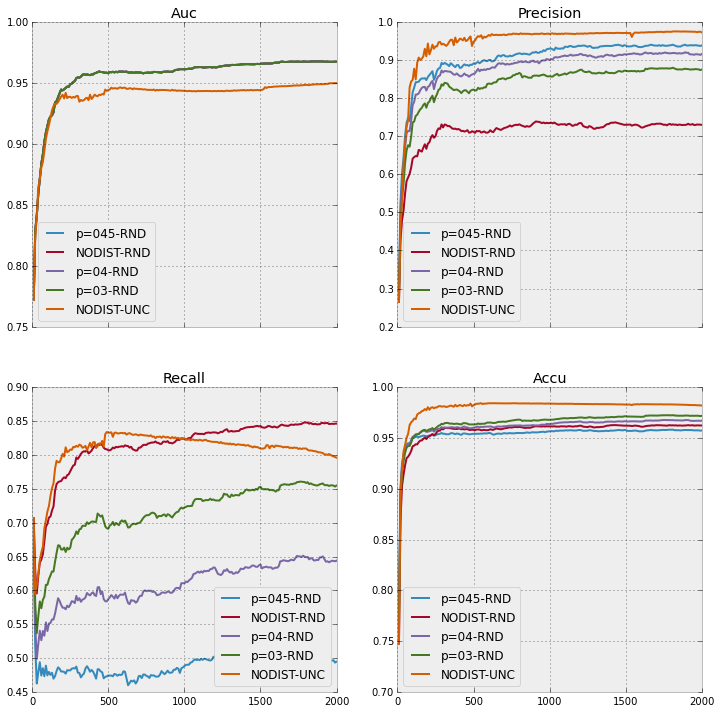

In [107]:
DATA2= '/Users/maru/Google Drive/AAL-Experiments/empirical-study/letterAM-bias/'
ax = None
_, a = plt.subplots(2,2,figsize=(12,12), sharex='all')
for m,s in zip(me,[a[0][0], a[0][1], a[1][0], a[1][1]]):
    ax = plot_measure([DATA2],m, s)
plt.savefig("all_measures_threshold2.pdf", bbox_inches="tight", dpi=200, transparent=True)


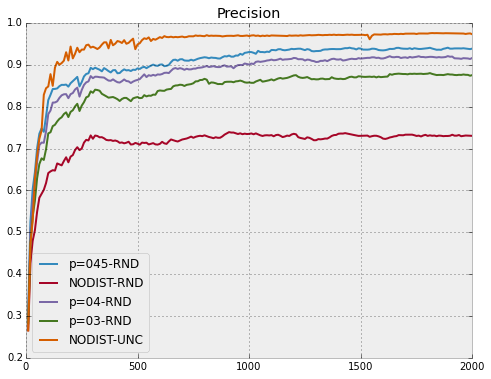

In [106]:
plot_measure([DATA2],'precision')

In [97]:

file_names = get_result_filenames([DATA2], 'recall',recursive=False, filtername='')
lbl_names = ["-".join(np.array([get_name(k) for k in name.split('_')])[[1,10]]) for name in file_names]
print lbl_names




['p=03-RND', 'p=045-RND', 'p=04-RND', 'p=05-RND', 'p=-03-RND', 'p=-045-RND', 'p=-04-RND', 'p=-05-RND', 'NODIST-RND', 'NODIST-UNC']


In [92]:
name.split('_')

['/Users/maru/Google Drive/AAL-Experiments/empirical-study/letterAM-bias/LETTERAM',
 'N03',
 'TOP',
 'F5',
 'SS',
 'TH',
 'ALL',
 '',
 'TH',
 '',
 'mARTIORACLERND',
 'cNB05',
 't5.recall.ave.txt']

In [40]:
[get_name(k) for k in name.split('_')][1]

'N03'

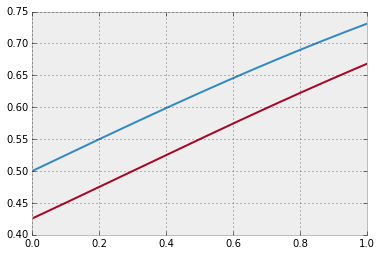

In [84]:
def logit(p):
    return np.exp(p)/(np.exp(p)+1)

p = np.arange(0,1,0.001)
# plt.plot(p, p+0.3)
plt.plot(p,logit(p))
plt.plot(p,logit(p-.3))
# plt.plot(p,logit(p-0.3))
# plt.plot(p,logit(p+0.3))

In [83]:

print logit(.31)
print logit(1-.31)
print logit(.61)
print logit(1-.61)



0.576885261132
0.665966926752
0.647940802081
0.596282699297
